#CM4709 Computer Vision
#Lab 04 Convolutional Neural Network

##Aims
1. Use the Keras library to build a Convolutional Neural Network (CNN).
1. Use a CNN to classify images in the Fashion MNIST dataset.


##The Fashion MNIST Dataset

In Lab 03, we used a Neural Network to classify images in the [fashion MNIST dataset](https://www.kaggle.com/datasets/zalando-research/fashionmnist).
This week, we will use a Convolutional Neural Network (CNN) to do the same job.
We will compare the performance of these 2 approaches before any tuning.

The following code is from Lab 03.
It simply loads the Fashion MNIST data and prepare the training, validation, and testing datasets.

There is no change from last week:


In [1]:
#import libraries
import tensorflow as tf
from tensorflow import keras

#load dataset from Keras
(x_train_full,y_train_full),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()

#split full training dataset into validation and training subsets
x_valid=x_train_full[:5000]/255.0
x_train=x_train_full[5000:]/255.0
y_valid=y_train_full[:5000]
y_train=y_train_full[5000:]

print('Full training dataset (images): ',x_train_full.shape)
print('Full training dataset (labels): ',y_train_full.shape)
print('  Training dataset (images): ',x_train.shape)
print('  Training dataset (labels): ',y_train.shape)
print('  Validation dataset (images): ',x_valid.shape)
print('  Validation dataset (labels): ',y_valid.shape)
print('Testing dataset (images): ',x_test.shape)
print('Testing dataset (labels): ',y_test.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Full training dataset (images):  (60000, 28, 28)
Full training dataset (labels):  (60000,)
  Training dataset (images):  (55000, 28, 28)
  Training dataset (labels):  (55000,)
  Validation dataset (images):  (5000, 28, 28)
  Validation dataset (labels):  (5000,)
Testing dataset (images):  (10000, 28, 28)
Testing dataset (labels):  (10000,)


##Building the Neural Network

The following code builds a neural network of 4 layers.
1. We use a [Sequential model](https://keras.io/guides/sequential_model/).
1. We start our model by passing an [Input](https://keras.io/api/layers/core_layers/input/) object to it, so that it knows its input shape from the beginning.
1. The input will feed into a [Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/) layer.
1. This is followed by a [MaxPooling2D](https://keras.io/api/layers/pooling_layers/max_pooling2d/) layer.
1. Then another [Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/) layer.
1. And another [MaxPooling2D](https://keras.io/api/layers/pooling_layers/max_pooling2d/) layer.
1. Then we flatten the layer.
1. Fit it into a [Dense](https://keras.io/api/layers/core_layers/dense/) layer.
1. Finally the output layer has 1 neurons, corresponding to the 10 classes in the dataset. Again, we use the [Softmax activation function](https://keras.io/api/layers/activations/#softmax-function) in the output layer.

In [21]:
#create a neural network using Keras
model=keras.models.Sequential()

model.add(keras.Input(shape=(28,28,1)))

model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3),activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3),activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3),activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())

# Densely connected layers
model.add(tf.keras.layers.Dense(128, activation='relu'))

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(64, activation='relu'))

model.add(tf.keras.layers.Dropout(0.2))

# output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 16)            │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 144)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          18,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,266 (126.04 KB)

 Trainable params: 32,266 (126.04 KB)

 Non-trainable params: 0 (0.00 B)

##Questions
Look at different layers in the CNN:
1. What is the size of the kernel in the 1st convolutional layer?
1. How many kernels do we have in the 1st conv layer?
1. How many parameters are in the 1st conv layer? What do they correspond to?
1. What is the size of the 1st pooling layer?
1. Compare the number of parameters in a NN. What do you notice?

##<font color="red">Answers</font>


1. <font color="red">3x3. In fact, all convolutional layers are using 3x3 filters, which is quite easy to see in the code.</font>
1. <font color="red">16.</font>
1. <font color="red">16 filters, 9 parameters per filter. A total of 16*9=144. The extra 16 parameters are biases for the 16 filters. See the [Keras reference here](https://keras.io/api/layers/convolution_layers/convolution2d/). If you wonder about the number of parameters in the 2nd conv layer, see [this web page](https://dingyan89.medium.com/calculating-parameters-of-convolutional-and-fully-connected-layers-with-keras-186590df36c6) which discusses how the number of parameters in a conv layer is calculated.</font>
1. <font color="red">The 1st pooling layer is using a size of 2x2. It is thus reducing the feature map to half its size from 28x28 to 14x14. Note that we use a padding of "same" in the convultional layer. So there is no size shrink in the feature map before pooling.</font>
1. <font color="red">In this CNN, we have 32266 parameters. In the last NN in Lab 03, we had 266610 parameters. That is 8.2 times!</font>



##Preparing the Labels

There are 10 classes in the dataset.
The output layer, with 10 neurons, expect a hot-one encoding.
For example, an output label of `4` is expected in the form of a vector/array: `[0,0,0,1,0,0,0,0,0,0]`.

The following code show you the shape of the training dataset labels, and the first element value:

In [22]:
print('y_train shape: ',y_train.shape)
print('y_train[0]: ',y_train[0])

y_train shape:  (55000,)
y_train[0]:  4


Instead of a value of 4, we want the output in the 1-hot-encoding format. e.g. a vector [0,0,0,0,1,0,0,0,0,0]. The following code converts the output datasets into the expected format/encoding. We use a utility function [`keras.utils.categorical(...)`](https://keras.io/api/utils/python_utils/#tocategorical-function):. Note that we only do this to the output label. i.e. Y:

In [23]:
y_train_cat=keras.utils.to_categorical(y_train)
y_test_cat=keras.utils.to_categorical(y_test)
y_valid_cat=keras.utils.to_categorical(y_valid)

print('y_train_cat.shape: ',y_train_cat.shape)
print('y_train_cat[0]: ',y_train_cat[0])

y_train_cat.shape:  (55000, 10)
y_train_cat[0]:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


##Compiling and Training the Model

Now we can compile and train the model.
This time we are using the [Adam optimizer](https://keras.io/api/optimizers/adam/).
Loss function is [categorical_cross_entropy](https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class).

##Questions:
1. Look at the output dataset (i.e. `y_train_cat`). Why do you think we use `categorical_crossentropy` as the loss function?

##<font color="red">Answers:</font>
1. <font color="red">Our output has 10 classes, represented as a vector in one-hot-encoding. `categorical_crossentropy` is the appropriate loss function. Read the link above for more information.</font>

In [24]:
# compile with adam optimizer & categorical_crossentropy loss function
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

#train model
history=model.fit(x_train,y_train_cat,epochs=20,
                  validation_data=(x_valid,y_valid_cat))


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.6078 - loss: 1.0361 - val_accuracy: 0.8466 - val_loss: 0.4135
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8256 - loss: 0.4777 - val_accuracy: 0.8664 - val_loss: 0.3528
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8526 - loss: 0.4100 - val_accuracy: 0.8842 - val_loss: 0.3160
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8690 - loss: 0.3682 - val_accuracy: 0.8926 - val_loss: 0.2964
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8757 - loss: 0.3423 - val_accuracy: 0.8864 - val_loss: 0.3036
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8835 - loss: 0.3228 - val_accuracy: 0.9012 - val_loss: 0.2792
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8911 - loss: 0.3022 - val_accuracy: 0.9016 - val_loss: 0.2695
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8929 - loss: 0.2960

##Visualising the Training

The following code (from Lab 03) shows the graphs of loss, accuracy, validation-loss, and validation-accuracy as the training progressed:

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


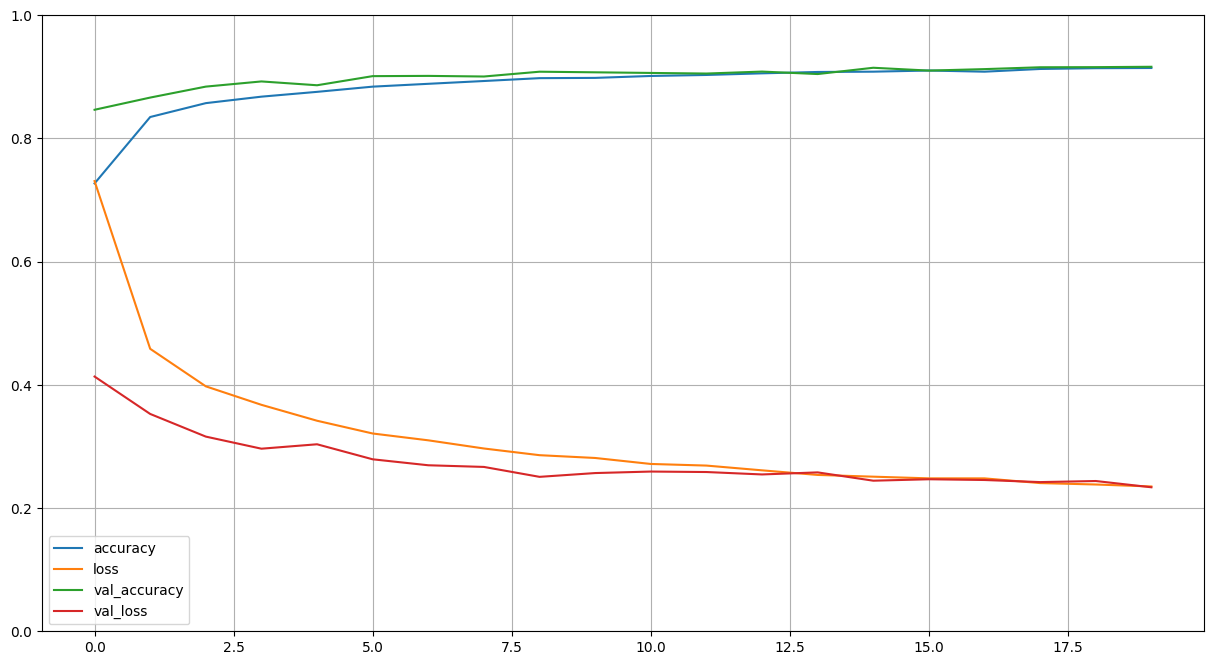

In [25]:
import pandas as pd
import matplotlib.pyplot as pyplot

#show keys in the history
print(history.history.keys())

#plot graphs
pd.DataFrame(history.history).plot(figsize=(15,8))
pyplot.grid(True)
pyplot.gca().set_ylim(0,1)
pyplot.show()

##Question
1. What do you observe in the graphs?
1. What does this compare with the NN solution in Lab 03 on the same dataset?

##Answers
1. <font color="red">The patterns are quite normal for a training task: Accuracy increases, and loss decreases as the training progresses.</font>
1. <font color="red">There are some major difference comparison the training statistics of CNN versus NN (Lab 03): Firstly, we only trained for 20 epoches in the CNN, versus 30 in the NN. Secondly, at the same epoch, accuracy is higher, and loss is lower in the CNN.</font>

##Testing the Model

Finally, we use the testing dataset to evaluate the CNN's performance on unseen data:

In [26]:
#evaluate the model using the testing dataset
(loss,accuracy)=model.evaluate(x_test,y_test_cat)

print('Loss: ',loss)
print('Accuracy: ',round(accuracy,2)*100,'%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8203 - loss: 32.6219
Loss:  32.64079284667969
Accuracy:  82.0 %


##Questions

1. How does the performance of the CNN compare with the NN in Lab 03?
1. Suggest ways to improve the model's performance.

##<font color="red">Answers</font>
1. <font color="red">NN in Lab 03: Loss=71.9822. Accuracy=87.0%. interesting enough, the CNN has a lower loss but also a lower accuracy than the NN. The lower loss is a good thing. But the lower accuracy is no good.</font>
1. <font color="red">There are various reasons for this. It could be that the training data are not good representation of the dataset as we do not sample. If the distribution of classes is not even then some classes can be over/under-represented in the training set. It does not look like an over-fitting issue though, as the graph is still showing a steady increase in accuracy.</font>

##Doing Prediction

The following code below from Lab 03 takes a random image from the testing dataset and does a prediction of its class:

Image shape:  (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
Prediction output:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Predicted class:  Pullover
Known class:  Pullover


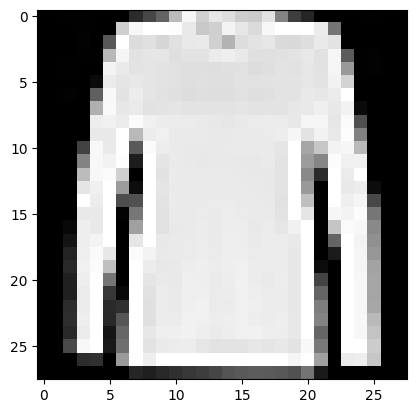

In [27]:
import numpy as np
import random

#class names in an array
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#get a random image from the testing dataset
(instance_count,width,height)=x_test.shape    #get dataset size
index=random.randint(0,instance_count-1)      #get an index witin dataset
image=x_test[index]                           #get image
pyplot.imshow(image,cmap='gray')              #show image

#need to add 1 dimension to array to fit input shape
oneImage=np.expand_dims(image,axis=0)
print('Image shape: ',oneImage.shape)

#predict image class
[prediction]=model.predict(oneImage)
print('Prediction output: ',prediction)

#The output is a vector. We need to find the index with the highest value.
#Luckily numpy has a handy function to do this.
classIndex=np.argmax(prediction,axis=-1)

#With the class index found, we can get the class name form the array/list.
predictedClass=class_names[classIndex]
print('Predicted class: ',predictedClass)
print('Known class: ',class_names[y_test[index]])